In [ ]:
.pct_change() #get return，預設是1 

In [ ]:
.split() #分割

In [ ]:
.groupby() #分群依據

In [ ]:
.std(ddof=0) #標準差，在pandas的標準差預設是樣本標準差，所以要用ddof=0調成母體標準差

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
Data = pd.read_csv("NOMURA_PROJECT/Nomura_Global_Equity_Fund.csv")
Data = Data.drop(['Unnamed: 0'], axis=1)

In [31]:
## get return
dailyReturn = Data['Price'].pct_change()*100

In [32]:
## 每季報酬率的標準差
date_split = []
temp = Data['Date']
for i in range(Data['Date'].size):
    date_split.append(temp[i].split('/'))

new_Data = pd.DataFrame(date_split, columns = ['Year', 'Month', 'Day'])

season = {'s1':['01', '02', '03'], 's2':['04', '05', '06'], 's3':['07', '08', '09'], 's4':['10', '11', '12']}   
seasonal = []
for j in range(new_Data['Month'].size):
    if new_Data['Month'][j] in season['s1']:
        seasonal.append('s1')
    elif new_Data['Month'][j] in season['s2']:
        seasonal.append('s2')
    elif new_Data['Month'][j] in season['s3']:
        seasonal.append('s3')
    elif new_Data['Month'][j] in season['s4']:
        seasonal.append('s4')
new_Data['Seasonal'] = seasonal

dailyReturn = Data['Price'].pct_change()*100
new_Data['DailyReturn_std'] = dailyReturn

In [ ]:
new_Data.head()

In [34]:
Seasonal_std_df = new_Data.groupby(['Year', 'Seasonal']).std(ddof=0)
Seasonal_std_df[Seasonal_std_df['DailyReturn_std'] > 1.68233294] #標準差大於1.68233294的

DailyReturn_std
Year Seasonal                 
2000 s1               1.713400
2001 s1               2.002611
2002 s3               1.831770
2008 s4               2.528183
2020 s1               2.979827
     s2               2.987675

(array([27., 31., 10., 18.,  2.,  2.,  1.,  0.,  1.,  2.]),
 array([0.37699104, 0.63805942, 0.8991278 , 1.16019618, 1.42126456,
        1.68233294, 1.94340132, 2.2044697 , 2.46553808, 2.72660646,
        2.98767484]),
 <a list of 10 Patch objects>)

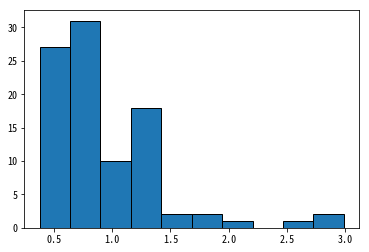

In [10]:
plt.hist(Seasonal_std_df['DailyReturn_std'], bins=10, edgecolor="black")

- array1：次數
- array2：bin的邊界值

Text(0, 0.5, '次數')

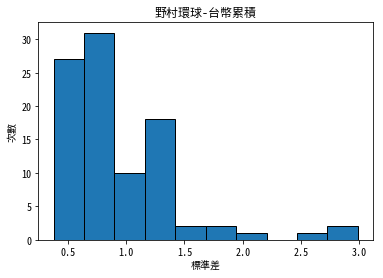

In [12]:
plt.hist(Seasonal_std_df['DailyReturn_std'], bins=10, edgecolor="black")
plt.rcParams['font.sans-serif'] = ['Noto Sans Mono CJK TC']
plt.title('野村環球-台幣累積')
plt.xlabel("標準差")
plt.ylabel("次數")